# Run SurvTRACE on SUPPORT dataset

In [1]:
import pdb
from collections import defaultdict
import matplotlib.pyplot as plt

from survtrace.dataset import load_data
from survtrace.evaluate_utils import Evaluator
from survtrace.utils import set_random_seed
from survtrace.model import SurvTraceSingle
from survtrace.train_utils import Trainer
from survtrace.config import STConfig

# define the setup parameters
STConfig['data'] = 'support'

set_random_seed(STConfig['seed'])

hparams = {
    'batch_size': 128,
    'weight_decay': 0,
    'learning_rate': 1e-3,
    'epochs': 20,
}

In [2]:
# load data
df, df_train, df_y_train, df_test, df_y_test, df_val, df_y_val = load_data(STConfig)

# get model
model = SurvTraceSingle(STConfig)

# initialize a trainer
trainer = Trainer(model)
train_loss, val_loss = trainer.fit((df_train, df_y_train), (df_val, df_y_val),
        batch_size=hparams['batch_size'],
        epochs=hparams['epochs'],
        learning_rate=hparams['learning_rate'],
        weight_decay=hparams['weight_decay'],)

use pytorch-cuda for training.


D:\UIUC_AI_Health\SurvTRACE\survtrace\train_utils.py:195: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:1025.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


[Train-0]: 69.46480572223663
[Val-0]: 1.4033393859863281
[Train-1]: 58.58011257648468
[Val-1]: 1.3492838144302368
[Train-2]: 57.890218019485474
[Val-2]: 1.33890700340271
[Train-3]: 57.753629088401794
[Val-3]: 1.3360865116119385
[Train-4]: 57.74876081943512
[Val-4]: 1.3369407653808594
EarlyStopping counter: 1 out of 5
[Train-5]: 57.602696657180786
[Val-5]: 1.3291189670562744
[Train-6]: 57.440733194351196
[Val-6]: 1.3298711776733398
EarlyStopping counter: 1 out of 5
[Train-7]: 57.411641240119934
[Val-7]: 1.3271820545196533
[Train-8]: 57.25203001499176
[Val-8]: 1.3372454643249512
EarlyStopping counter: 1 out of 5
[Train-9]: 57.02588772773743
[Val-9]: 1.3317675590515137
EarlyStopping counter: 2 out of 5
[Train-10]: 56.98663830757141
[Val-10]: 1.3470638990402222
EarlyStopping counter: 3 out of 5
[Train-11]: 56.84599244594574
[Val-11]: 1.3374598026275635
EarlyStopping counter: 4 out of 5
[Train-12]: 56.71632444858551
[Val-12]: 1.3387290239334106
EarlyStopping counter: 5 out of 5
early stops 

In [3]:
# evaluate model
evaluator = Evaluator(df, df_train.index)
evaluator.eval(model, (df_test, df_y_test))
print("done")

For 0.25 quantile,
TD Concordance Index - IPCW: 0.6691149747018741
Brier Score: 0.13460396781829126
For 0.5 quantile,
TD Concordance Index - IPCW: 0.6258344351721034
Brier Score: 0.21159583429898995
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6150206831866872
Brier Score: 0.22910614139862234
done


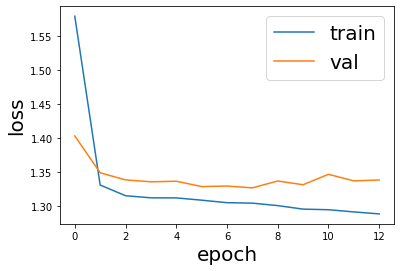

In [4]:
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()